In [1]:
import os
import numpy as np
from nilearn import plotting
import nibabel as nib

In [3]:
path = '/home/jupyter/ai_postgraduate_project/data/resized_dataset/imagesTr/pancreas_001.nii.gz'

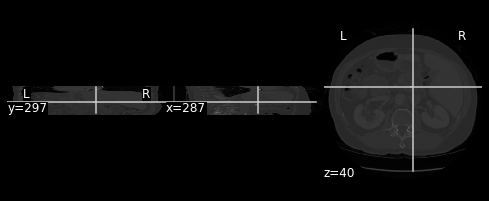

In [4]:
img = nib.load(path)
plotting.plot_anat(img)

In [5]:
array = np.array(img.dataobj)

In [6]:
new_image = nib.Nifti1Image(array, affine=np.eye(4))

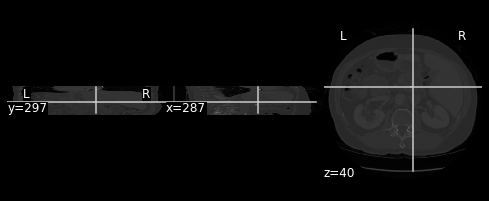

In [7]:
plotting.plot_anat(new_image)

In [8]:
def decide_to_apply(cond):
    decision = cond and np.random.random(1) > 0.5
    return decision


def random_flip(
    img1, 
    img2, 
    apply_flip_axis_x, 
    apply_flip_axis_y, 
    apply_flip_axis_z):
    
    apply_flip = [apply_flip_axis_x, apply_flip_axis_y, apply_flip_axis_z]
    
    for i in range(len(apply_flip)):
        if decide_to_apply(apply_flip[i]):
            img1 = np.flip(img1, axis=i)
            img2 = np.flip(img2, axis=i)
    
    return (img1, img2)
    

def add_gaussian_offset(img1, img2, apply_gaussian_offset, sigma):
    
    if decide_to_apply(apply_gaussian_offset):
        offsets = np.random.normal(0, sigma, ([1] * (img1.ndim - 1) + [img1.shape[-1]]))
        img1 += offsets
        img2 += offsets
    
    return (img1, img2)


def add_gaussian_noise(img1, img2, apply_gaussian_noise, sigma):
 
    if decide_to_apply(apply_gaussian_noise):
        noise = np.random.normal(0, sigma, img1.shape)
        img1 += noise
        img2 += noise
        
    return (img1, img2)
    
    
def apply_transformations(
    img1,
    img2,
    apply_flip_axis_x = True,
    apply_flip_axis_y = True,
    apply_flip_axis_z = True,
    apply_gaussian_offset = True,
    apply_gaussian_noise = True,
    sigma_gaussian_offset = 0.1,
    sigma_gaussian_noise = 0.05
):
    img1 = img1.astype(float)
    img2 = img2.astype(float)
    img1, img2 = random_flip(img1, img2, apply_flip_axis_x, apply_flip_axis_y, apply_flip_axis_z)
    img1, img2 = add_gaussian_offset(img1, img2, apply_gaussian_offset, sigma = sigma_gaussian_offset)
    img1, img2 = add_gaussian_noise(img1, img2, apply_gaussian_noise, sigma = sigma_gaussian_noise)
    
    return (img1, img2)

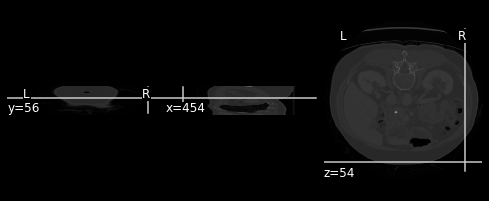

In [9]:
array_flip = apply_transformations(array, array)
new_image = nib.Nifti1Image(array_flip[0], affine=np.eye(4))
plotting.plot_anat(new_image)